# Machine Learning Notes - Loss functions

## A List of Related Posts
1. [Pytorch]({% post_url 2021-05-04-machine-learning-pytorch %})
2. [Loss function(this)]({% post_url 2021-05-07-machine-learning-loss %})
3. [Backpropagation]({% post_url 2021-05-07-machine-learning-backpropagation %})

## Loss Introduction

Given an input $X$ and a model parameterized by $\theta$, we would like to minimize a loss function $L(X; \theta)$ by adjusting model parameter $\theta$. The optimization can usually be done using gradient decent, Guassian Netwon, etc. 

## Mean Square Loss

Let's start with a very simple linear regression problem. In order to visualize the loss vs parameter in a 2D plot, we parameterize the line as $y = ax$. 

$$
L = \sum_{i}(\hat{y}_i - y_i)^2
$$ 
where, $\hat{y}$ is the predicted value and $y$ is the ground truth. 

Best $a$ with least loss is 1.00


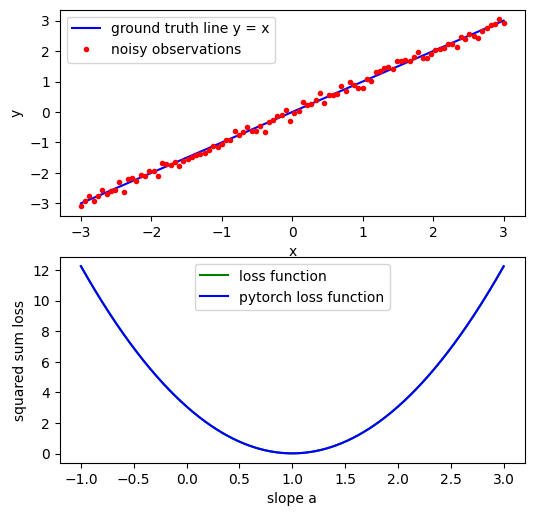

In [153]:
# Simple Linear Regression

import numpy as np
import matplotlib.pyplot as plt
import torch

a = 1
x = np.linspace(-3, 3, 100)
y = a * x 
y_hat = y + np.random.normal(0, 0.1, x.shape)

a_hat = np.linspace(-1, 3, 1000)
losses = [np.sum((t*x-y_hat)**2)/x.shape[0] for t in a_hat]
loss_func = torch.nn.MSELoss()
pytorch_losses = [loss_func(torch.tensor([t*x]), torch.tensor([y_hat])).item() for t in a_hat]

a_best = a_hat[np.argmin(losses)]
print(f'Best $a$ with least loss is {a_best:.2f}')

fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(6,6), dpi=100)

ax1.plot(x, y, '-b', label='ground truth line y = x')
ax1.plot(x, y_hat, 'r.', label='noisy observations')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.legend()

ax2.plot(a_hat, losses, '-g', label='loss function')
ax2.plot(a_hat, pytorch_losses, '-b', label='pytorch loss function')
ax2.set_ylabel('squared sum loss')
ax2.set_xlabel('slope a')
ax2.legend()

#

## Hinge Loss

For classification, we want the predicted score with the correct class label as large as possible. Hinge Loss is shown below. $s_c$ is the loss of the correct class and $s_i$ is a loss of an incorrect class.
$$
L = \sum_{i}{\max(0, s_i - s_c + 1)}
$$

In [154]:
# Hinge Loss

import numpy as np 
W = np.random.rand(4, 3)
X = np.random.rand(4)
y = 1

score = np.matmul(X, W)
print(f'The correct label is {y}')
print(f'\n class 0 score: {score[0]:.2f}\n class 1 score: {score[1]:.2f}\n class 2 score: {score[2]:.2f}')
loss = np.sum([s-score[y]+1 if i != y else 0 for i, s in enumerate(score)])
expected = np.max([score[0] - score[y] + 1, 0] + np.max([score[2] - score[y] + 1, 0]))
assert(loss == expected)
print(f'\nHinge loss is {loss:.4f}')
#

The correct label is 1

 class 0 score: 1.22
 class 1 score: 0.96
 class 2 score: 1.69

Hinge loss is 2.9947


In [155]:
# Hinge loss in Pytorch

import torch
loss_func = torch.nn.MultiLabelMarginLoss(reduction='none')
x = torch.from_numpy(score)
 # for target y, only consider labels 3 and 0, not after label -1
target = torch.LongTensor([1,-1,-1])
output = loss_func(x, target)
print(f'\nPytorch Hinge loss is {output * x.shape[0]:.4f}')
#


Pytorch Hinge loss is 2.9947


## Cross Entropy Loss

Another common loss function used for classification is Cross Entropy loss. The cross-entropy of the distribution $q$ relative to a distribution $p$ over a given set is defined as:
$$
H(p,q) = -E_p[log(q)]
$$

KL divergence is defined as $KL(p || q) = H(p,q) - H(p)$, also know as relative entropy of true distribution of $p$ with respect to predicted distribution $q$.

For discrete distribution, 
$$
H(p, q) = -\sum_{x}p(x)log(q(x)) \\
H(p) = -\sum_{x}p(x)log(p(x)) \\
KL(p, q) = -\sum_{x}p(x)log(\frac{q(x)}{p(x)})
$$

We can use Softmax function to convert output score into a distribution:
$$
q_k = \frac{e^{s_k}}{\sum_i{e^{s_i}}} 
$$

Then if the loss function can be
$$
L = \sum_i{-log(q_{ic})}
$$
where $q_{ic}$ is the probability of the correct class for sample $i$.

In [156]:
# Cross Entropy Loss

import numpy as np 
W = np.random.rand(4, 3)
X = np.random.rand(4)
y = 1

score = np.matmul(X, W)
print(f'The correct label is {y}')
print(f'\n class 0 score: {score[0]:.2f}\n class 1 score: {score[1]:.2f}\n class 2 score: {score[2]:.2f}')
exp_s = np.exp(score) 
p = exp_s / np.sum(exp_s)
print(f'\n class 0 p: {p[0]:.2f}\n class 1 p: {p[1]:.2f}\n class 2 p: {p[2]:.2f}')
loss = -np.log(p[y])
print(f'\nCross entropy loss is {loss:.4f}')
#

The correct label is 1

 class 0 score: 1.27
 class 1 score: 1.80
 class 2 score: 1.46

 class 0 p: 0.26
 class 1 p: 0.43
 class 2 p: 0.31

Cross entropy loss is 0.8341


In [157]:
# Cross Entropy Loss in Pytorch

import torch
loss_func = torch.nn.CrossEntropyLoss()
x = torch.from_numpy(score).view(1, 3)
target = torch.tensor([y])
output = loss_func(x, target)
print(f'\nPytorch Cross entropy loss is {output.item():.4f}')
#


Pytorch Cross entropy loss is 0.8341
